In [30]:
from helpers import *

In [ ]:
df = pd.read_csv('../../DATAHUB/pos_from_nikkei_06262025.csv')
df['DATE'] = pd.to_datetime(df['DATE'])
df = df[df['TICKER_CODE'] != '9260']

df

,DATE,TICKER_CODE,TOTAL_SALES
0,2014-01-01,1301,619893
1,2014-01-01,1332,624741
2,2014-01-01,1333,866854
3,2014-01-01,1352,131442
4,2014-01-01,1379,822033
...,...,...,...
1100928,2025-06-15,NESN,12171195
1100929,2025-06-15,PG,11810082
1100930,2025-06-15,PM,499864
1100931,2025-06-15,UNA,1244219


In [32]:
# データ読み込みとフィルタリング
df_filtered = filter_data_cca(df)

df_filtered

original data: 1096749
filtered data: 992762


,DATE,TICKER_CODE,TOTAL_SALES
0,2014-01-01,1301,619893
1,2014-01-01,1332,624741
2,2014-01-01,1333,866854
3,2014-01-01,1352,131442
4,2014-01-01,1379,822033
...,...,...,...
1100903,2025-06-15,8228,71987
1100905,2025-06-15,9274,16285
1100906,2025-06-15,9305,1236230
1100907,2025-06-15,9852,470700


In [33]:
df_monthly = daily_to_monthly(df_filtered, 'TOTAL_SALES')
df_monthly

original data: 992762
monthly data: 34781


,MONTH,TICKER_CODE,TOTAL_SALES
0,2014-01,1301,21049027
1,2014-01,1332,166339746
2,2014-01,1333,186553299
3,2014-01,1352,877436
4,2014-01,1379,142479143
...,...,...,...
34776,2025-05,8228,2536364
34777,2025-05,9274,295897
34778,2025-05,9305,24617614
34779,2025-05,9852,4450302


In [34]:
df_yoy = calculate_yoy(df_monthly, 'TOTAL_SALES')
df_yoy

original data: 34781
yoy data: 31434


,MONTH,TICKER_CODE,TOTAL_SALES,YOY
3107,2015-01,1301,25254608,1.199799
3108,2015-01,1332,173103682,1.040663
3109,2015-01,1333,188857371,1.012351
3110,2015-01,1352,1636704,1.865326
3111,2015-01,1379,125180895,0.878591
...,...,...,...,...
34776,2025-05,8228,2536364,0.922658
34777,2025-05,9274,295897,0.845036
34778,2025-05,9305,24617614,1.299693
34779,2025-05,9852,4450302,1.003495


In [35]:
# price dataの読み込み
price_data = pd.read_csv('../../DATAHUB/price_data_with_dividends_from_yfinance_06262025.csv')
# price_data = pd.read_csv('../../DATAHUB/new_price_data.csv')
price_data

,DATE,TICKER_CODE,PRICE,DIVIDENDS,MONTHLY_RETURN
0,2014-01,1301,2054.911621,0.0000,NaN
1,2014-02,1301,2054.911621,0.0000,0.000000
2,2014-03,1301,2016.429810,72.3925,0.016502
3,2014-04,1301,2070.746582,0.0000,0.026937
4,2014-05,1301,2031.527954,0.0000,-0.018939
...,...,...,...,...,...
35236,2025-02,4927,1197.000000,0.0000,-0.154064
35237,2025-03,4927,1272.500000,0.0000,0.063074
35238,2025-04,4927,1304.500000,0.0000,0.025147
35239,2025-05,4927,1371.500000,0.0000,0.051361


In [36]:
# percentiles = [10, 25, 40, 100]

multiple_portfolios = create_multiple_portfolios(df_yoy, price_data, percentiles=[20, 25, 30, 100])
multiple_portfolios

上位20%のポートフォリオを作成中...
上位25%のポートフォリオを作成中...
上位30%のポートフォリオを作成中...
上位100%のポートフォリオを作成中...


,top_20p,top_25p,top_30p,top_100p
MONTH,,,,
2015-01,0.017826,0.018278,0.025267,0.028317
2015-02,0.052495,0.047454,0.048520,0.034930
2015-03,0.029441,0.043464,0.037242,0.029785
2015-04,0.027691,0.031737,0.038884,0.023985
2015-05,0.036106,0.033244,0.033410,0.026067
...,...,...,...,...
2025-01,0.012641,0.007748,0.004761,-0.002822
2025-02,0.009590,-0.004362,-0.009402,-0.009903
2025-03,0.049552,0.047137,0.040083,0.028668


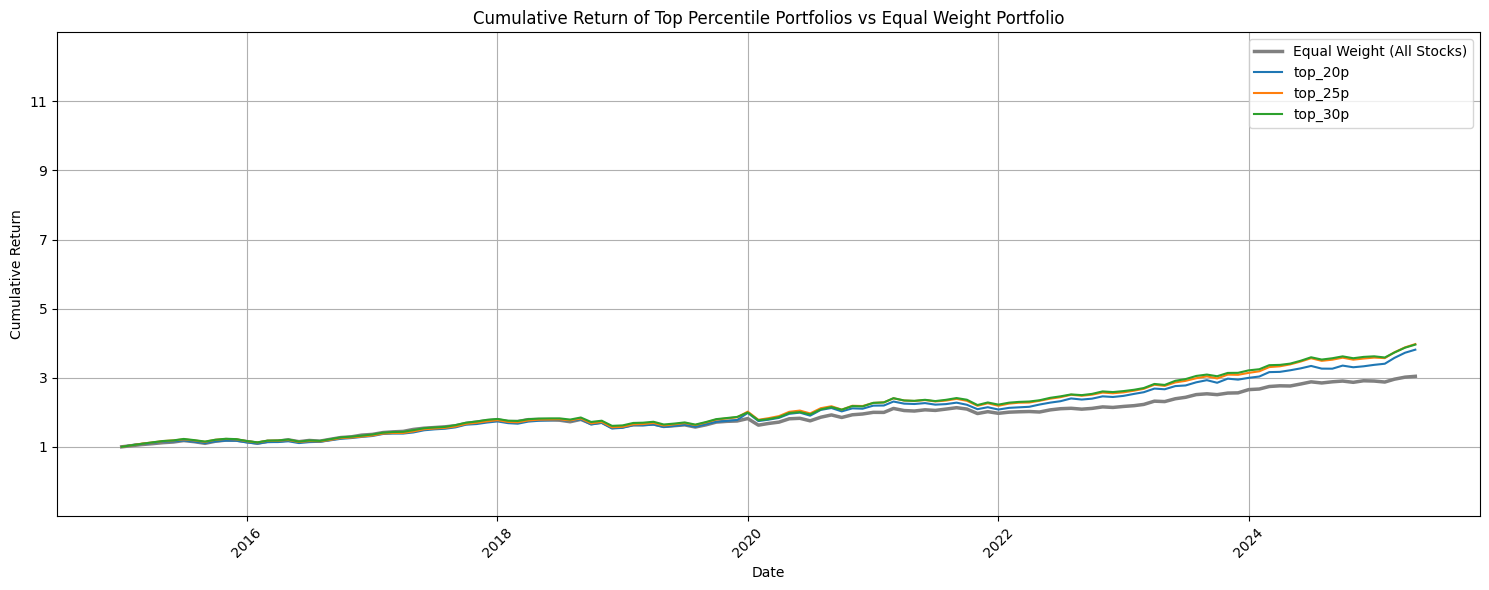

In [37]:
# set date index
multiple_portfolios.index = pd.to_datetime(multiple_portfolios.index)

# 可視化
plot_portfolio_returns(multiple_portfolios)

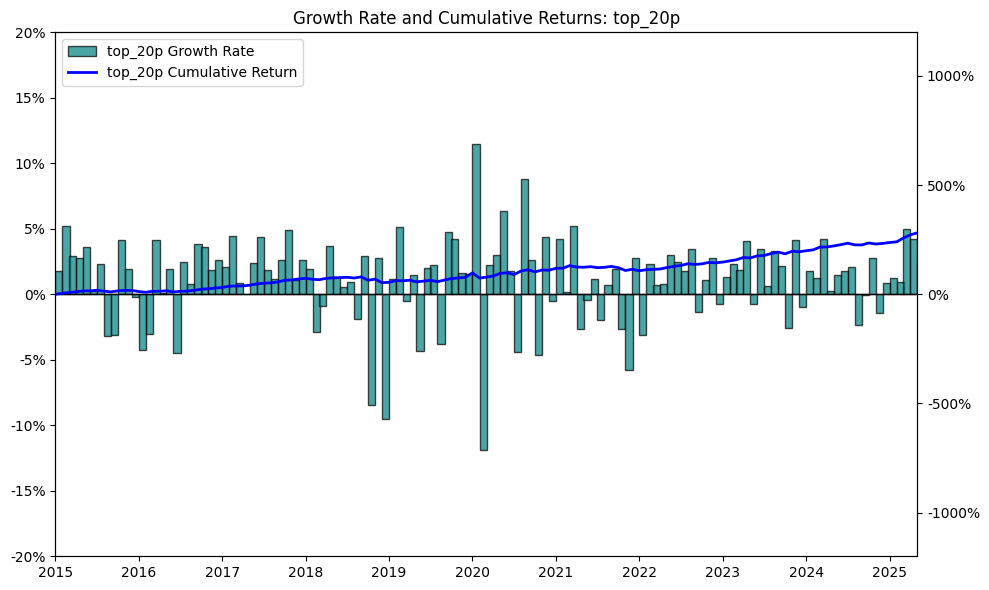

In [38]:
plot_growth_rate(multiple_portfolios, 'top_20p')

In [39]:
# パフォーマンス指標計算
print("パフォーマンス指標を計算中...")
performance_metrics = calculate_performance_metrics(multiple_portfolios)

print("\n=== パフォーマンス指標 ===")
print(performance_metrics.round(2))


パフォーマンス指標を計算中...

=== パフォーマンス指標 ===
          Total Return (%)  Annual Return (%)  Monthly Return (%)  \
top_20p             288.05              13.90                1.14   
top_25p             304.66              14.36                1.17   
top_30p             305.95              14.40                1.17   
top_100p            212.72              11.57                0.96   

          Annual Volatility (%)  Monthly Volatility (%)  Sharpe Ratio  \
top_20p                   11.21                    3.24          1.24   
top_25p                   10.83                    3.13          1.33   
top_30p                   10.48                    3.03          1.37   
top_100p                   9.94                    2.87          1.16   

          Max Drawdown (%)  Win Rate (%)  
top_20p             -14.86          74.4  
top_25p             -14.06          74.4  
top_30p             -13.07          75.2  
top_100p            -13.10          72.0  


In [40]:
# 月次統計計算
print("\n=== 月次リターンの詳細統計 ===")
monthly_stats = calculate_monthly_statistics(multiple_portfolios)
print(monthly_stats.round(2))



=== 月次リターンの詳細統計 ===
          月次平均リターン (%)  月次ボラティリティ (%)  最小月次リターン (%)  最大月次リターン (%)  中央値 (%)
top_20p           1.14           3.24        -11.92         11.47     1.77
top_25p           1.17           3.13        -11.70          8.84     1.77
top_30p           1.17           3.03        -11.26          7.52     1.61
top_100p          0.96           2.87        -10.52          5.98     1.41


In [41]:
# 最終累積リターン計算
print("\n=== 最終累積リターン ===")
final_returns = calculate_final_returns(multiple_portfolios)
print(final_returns.to_string(index=False))



=== 最終累積リターン ===
Portfolio  Final Return
  top_30p          4.06
  top_25p          4.05
  top_20p          3.88
 top_100p          3.13


In [42]:
# 分析結果サマリー
generate_analysis_summary(multiple_portfolios, df_yoy, performance_metrics)


=== 分析結果サマリー ===
分析期間: 2015-01-01 00:00:00 から 2025-05-01 00:00:00
対象銘柄数: 274
分析したポートフォリオ: ['top_20p', 'top_25p', 'top_30p', 'top_100p']

最高パフォーマンス: top_30p (305.95%)
最低パフォーマンス: top_100p (212.72%)

最高シャープレシオ: top_30p (1.37)
最低最大ドローダウン: top_20p (-14.86%)

=== パーセンタイルポートフォリオ間の比較 ===
最高パーセンタイル: top_30p (305.95%)
最低パーセンタイル: top_100p (212.72%)
